In [2]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.datasets import make_classification
from IPython.display import Image 
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
# сгенерируйте линейно разделимую выборку для задачи бинарной классификации

# Логистическая регрессия

Конечным результатом задачи классификации является разбиение множества объектов на классы. Давайте усложним задачу и будем предсказывать не конкретные классы, а вероятности принадлежать им, например, для бинарной классификации мы будем предсказывать одно число, которое будет соответствовать вероятности принадлежать положительному классу. \
Такого результата можно достичь, если мы будем строить линейную регрессию над некоторыми признаками, а затем её результат переводить в отрезок $[0;1]$. В этом нам поможет сигмоидная функция, которая имеет вид:
<p style="text-align: center;"> $f(z) = \dfrac{1}{1 + e^{-z}}$ </p>

![sigmoid.webp](https://cmertin.github.io/images/2016/11/11_17-Loan_Approvals/Sigmoid_Function.png)
<p style="text-align: center;"></p>

Моделью логистической регрессии назовём функцию от весов и объекта вида:

<p style="text-align: center;"> $a(w, x) = \dfrac{1}{1 + e^{-w_0 - w_1x_1 + ... + w_mx_m}}$ </p>

Обучение данной модели происходит за счет кросс-энтропийной или логистическая функции потерь :
<p style="text-align: center;"> $-\sum\limits_{i=1}^{n}(y_ilog(a_i) + (1 - y_i)log(1 - a_i))$ </p>
где $a_i = a(w, x_i)$

#### Задание №1. Выведите шаг градиентного спуска для логистической функции потерь (приложить фото)

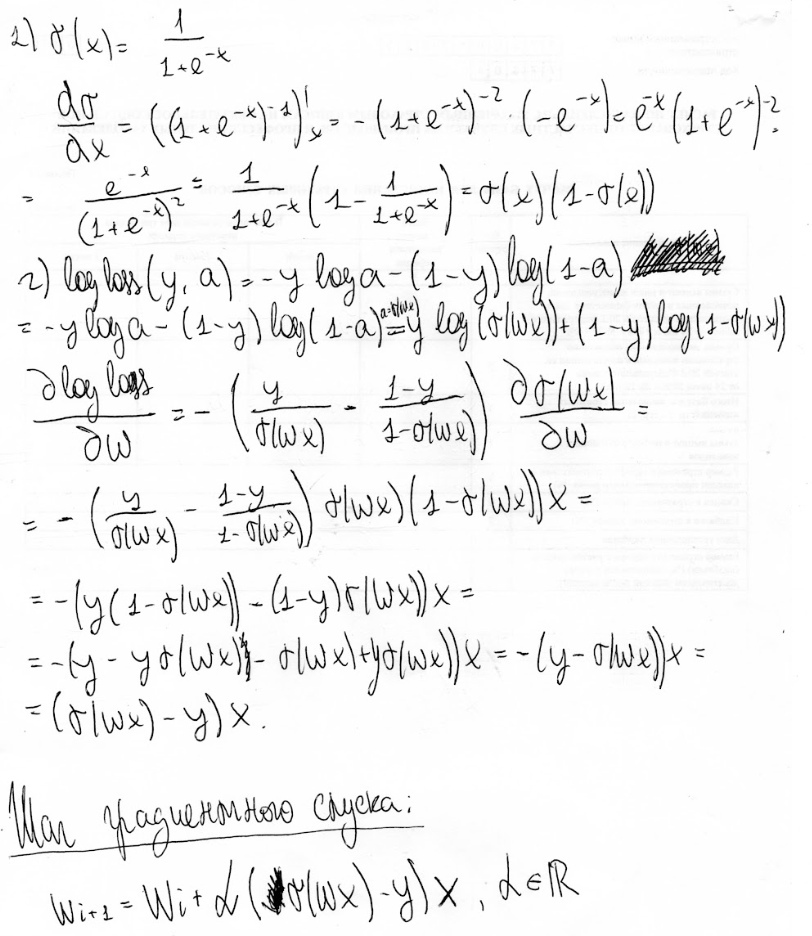

In [4]:
Image("./logloss.jpg", width=500, height=240) 

#### Задание №2. Напишите собственную логистическую регрессию

In [5]:
def sigmoid(x):
        return 1 / (1 + np.exp(-x))

class MyLogRegression:

    def __init__(self, lr=0.01, batch_size=25, num_steps=1000):
        self.lr = lr
        self.batch_size = batch_size
        self.num_steps = num_steps
        
    # обучение модели
    def fit(self, X, Y):
        w = np.random.uniform(-2, 2, X.shape[1])
        for i in range(self.num_steps):
            sample_indices = np.random.randint(X.shape[0], size=self.batch_size)
            w -= self.lr * np.dot(X[sample_indices].T, sigmoid(np.dot(X[sample_indices], w)) - Y[sample_indices]) / self.batch_size
        self.w = w
        return self

    # предсказание класса по выборке
    def predict(self, X): 
        return np.array([1 if sigmoid(np.dot(x, self.w)) >= 0.5 else 0 for x in X])

#### Задание №3. Сравните свою логистическую регрессию с аналогичной моделью из sklearn на сгенерированном датасете, опираясь на Accuracy. Баллы за задание: 10 - Accuracy > 99, 5 - Accuracy > 85, 0 - иначе

In [6]:
from sklearn.datasets import make_classification
%matplotlib notebook
import matplotlib.pyplot as plt

separable = False

while not separable:
    samples = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
    red = samples[0][samples[1] == 0]
    blue = samples[0][samples[1] == 1]
    separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])

<IPython.core.display.Javascript object>


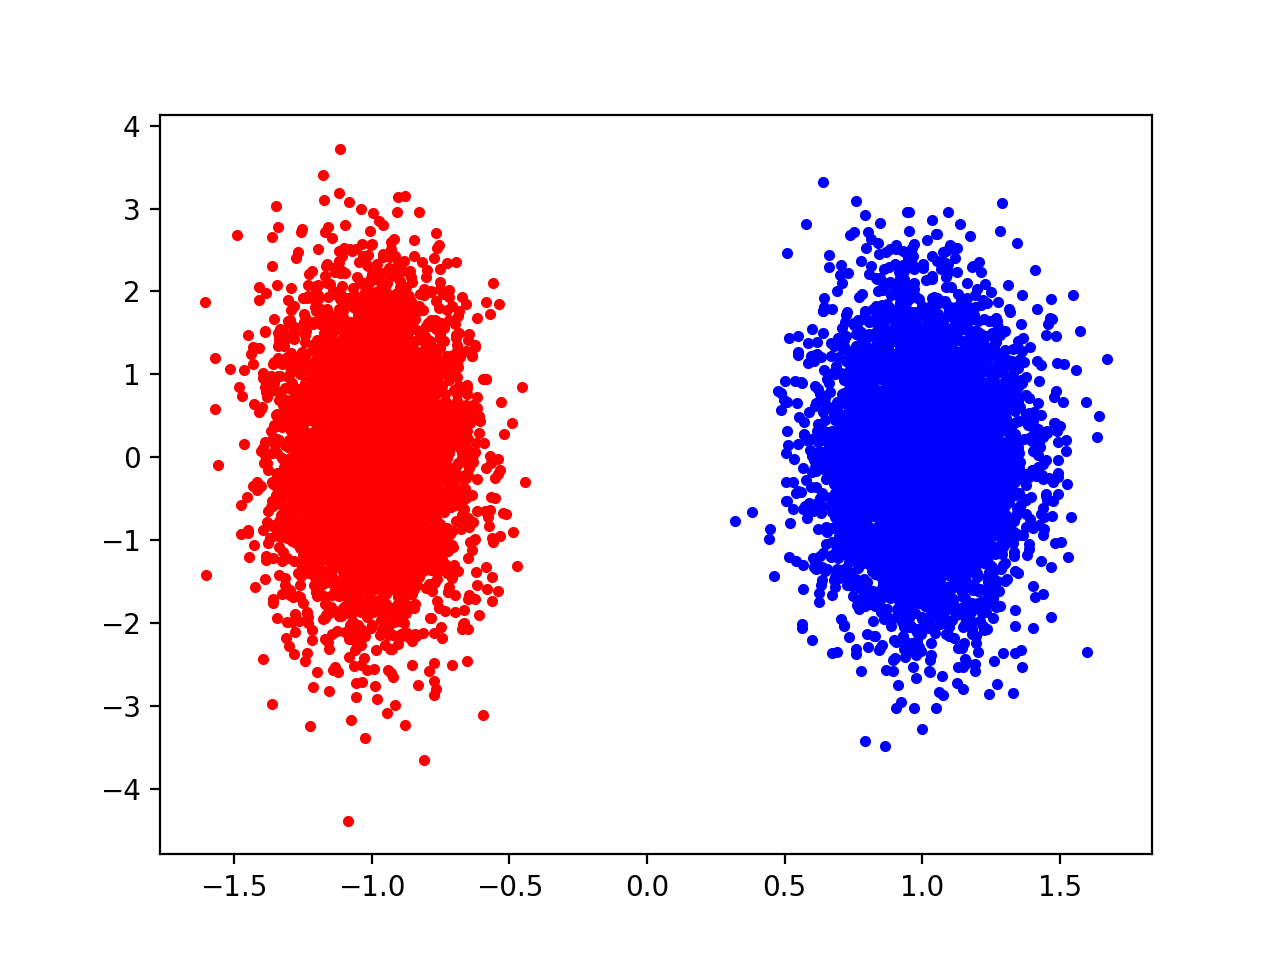

In [7]:
# Доказательство того, что датасет samples линейно разделим
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.show()

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(samples[0], samples[1], test_size=0.33, random_state=123)

# Обучение собственной модели
mlr = MyLogRegression(num_steps=15000)
mlr.fit(X_train, Y_train)
Y_pred_mlr = mlr.predict(X_test)

print(f"Accuracy (my own model): {round(accuracy_score(Y_test, Y_pred_mlr), 4)}")        

# Обучение модели LogisticRegression из модуля sklearn.linear_model
sklr = LogisticRegression()
sklr.fit(X_train, Y_train)
Y_pred_sklr = sklr.predict(X_test)

print(f"Accuracy (sklearn-model): {round(accuracy_score(Y_test, Y_pred_sklr), 4)}")

Accuracy (my own model): 1.0
Accuracy (sklearn-model): 1.0
